In [1]:
from sklearn import preprocessing
import pandas as pd
import numpy as np # we'll need it later
#Load the Boston dataset.

from sklearn.datasets import load_boston

boston = load_boston()
X,y = boston.data, boston.target

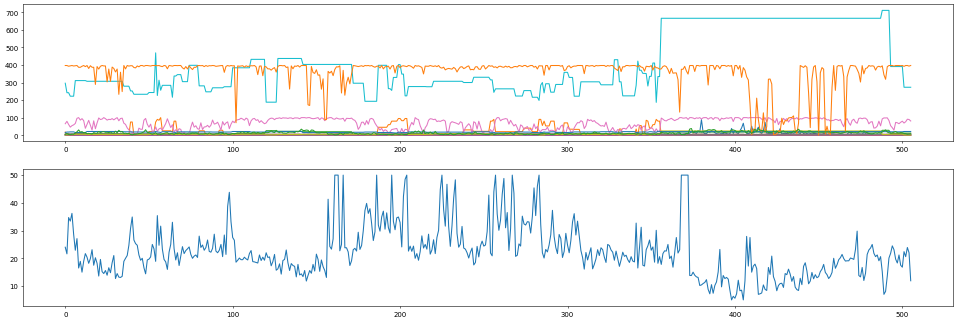

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 8), dpi=50)
plt.subplot(211)
plt.plot(X)
plt.subplot(212)
plt.plot(y)

In [6]:
import pandas as pd
import numpy as np
import hmmlearn
from hmmlearn.hmm import GaussianHMM

In [8]:
vals = np.expand_dims(y, 1)
n_states = 2
model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
hidden_states = model.predict(vals)

In [9]:
np.bincount(hidden_states)

array([372, 134], dtype=int64)

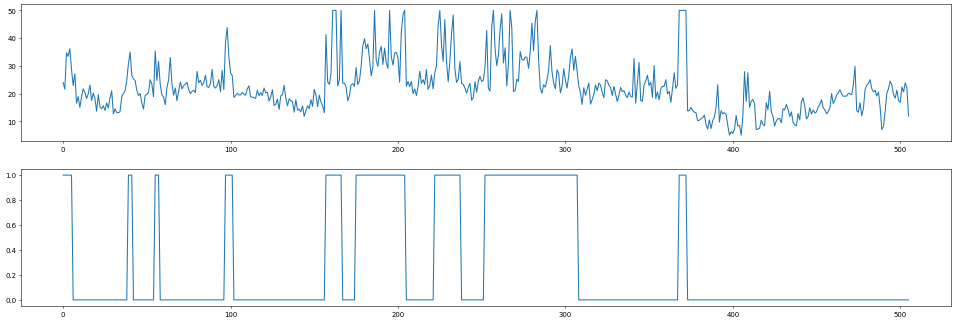

In [13]:
plt.figure(figsize=(24, 8), dpi=50)

plt.subplot(2, 1, 1)
plt.plot(y)

plt.subplot(2, 1, 2)
plt.plot(hidden_states)

In [14]:
def fitHMM(vals, n_states):
    vals = np.reshape(vals,[len(vals),1])
    
    # fit Gaussian HMM to Q
    model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
     
    # classify each observation as state 0 or 1
    hidden_states = model.predict(vals)
 
    # fit HMM parameters
    mus = np.squeeze(model.means_)
    sigmas = np.squeeze(np.sqrt(model.covars_))
    transmat = np.array(model.transmat_)
    print(mus)
    print(sigmas)
    
#     relabeled_states = [state_dict[h] for h in hidden_states]
    relabeled_states = hidden_states
    return (relabeled_states, mus, sigmas, transmat, model)

In [16]:
hidden_states, mus, sigmas, transmat, model = fitHMM(y, 2)

[18.57193306 33.30446372]
[5.18628178 9.06410612]


In [17]:
def plot_states(ts_vals, states, time_vals):
    
    fig, ax1 = plt.subplots(figsize=(24.0, 8.0))
    color = 'tab:red'
    ax1.set_xlabel('time')
    ax1.set_ylabel('traffic', color=color)
    ax1.plot(time_vals, ts_vals, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(time_vals,states,     color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.figure(figsize=(24, 8), dpi=50)
    plt.show()

In [21]:
t = np.array(range(len(y)))

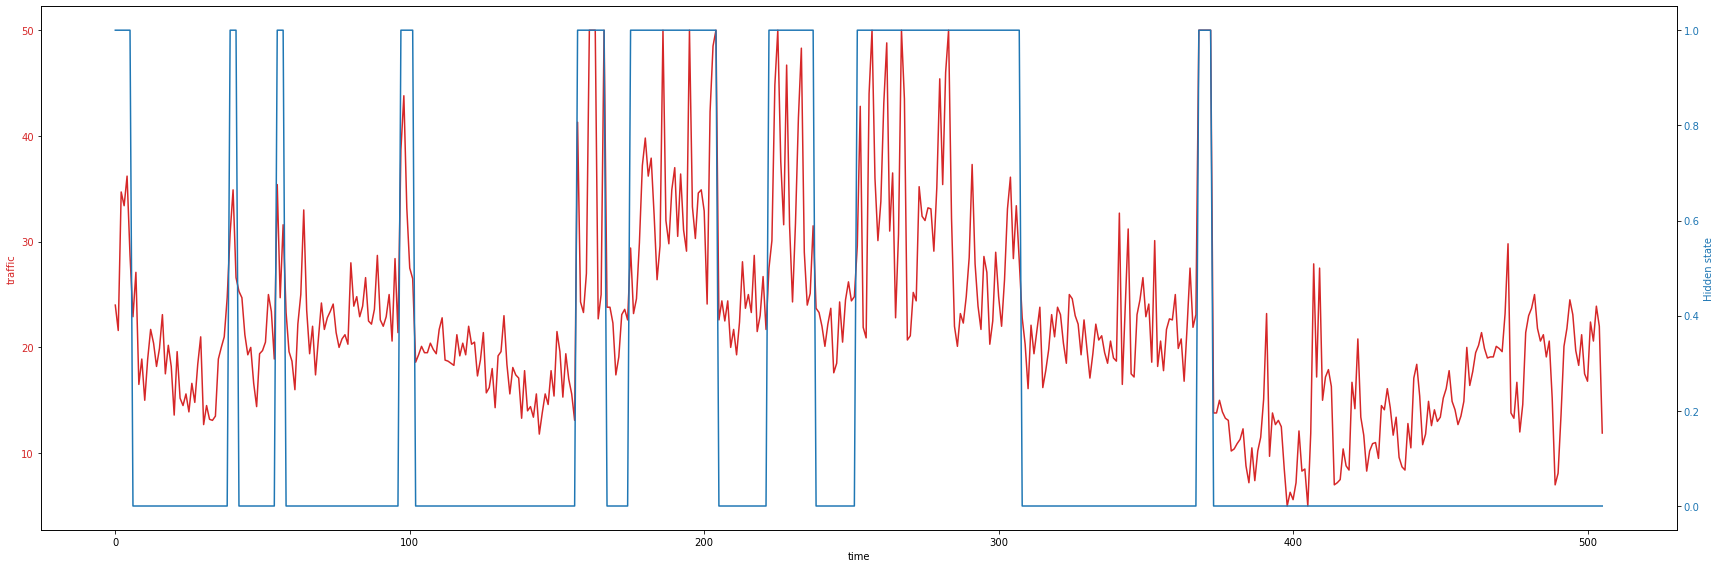

<Figure size 1200x400 with 0 Axes>

In [22]:
plot_states(y, hidden_states, t)